In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
sns.set_style('whitegrid')

In [2]:
# LORENZ.DAT
data = pd.read_table('data/LORENZ.DAT', header=None)

# scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data = np.array(data).flatten()

In [3]:
# create d-dimensional data
t, d = 16, 3
lagged = []

for i in range(0, d+1):
    lagged.append(np.roll(data, -t*i)[:-t*d])
    
lagged = np.array(lagged).T
lagged.shape
#unlagged = data[:-t]
#lagged = np.roll(data, -t)[:-t]

(16336, 4)

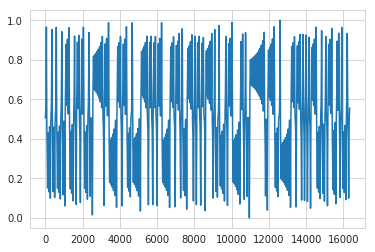

In [4]:
plt.plot(lagged[:, 0])

In [5]:
df = pd.DataFrame(lagged)
df.head()

,0,1,2,3
0,0.505204,0.529104,0.582915,0.804967
1,0.507508,0.530725,0.589690,0.827545
2,0.509557,0.532470,0.597134,0.850338
3,0.511395,0.534358,0.605311,0.872868
4,0.513057,0.536407,0.614286,0.894545


In [6]:
x = df[df.columns[0:-1]]
y = df[df.columns[-1]]

x = np.array(x)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.6,
                                                    random_state=None, shuffle=False)

In [7]:
from sklearn.neural_network import MLPRegressor

In [8]:
clf = MLPRegressor(hidden_layer_sizes=(20), activation='relu',
                   batch_size=200, shuffle=False, solver='adam', random_state=None, verbose=True)
clf.fit(X_train, y_train)

Iteration 1, loss = 0.02740804
Iteration 2, loss = 0.02249465
Iteration 3, loss = 0.01980311
Iteration 4, loss = 0.01753999
Iteration 5, loss = 0.01568613
Iteration 6, loss = 0.01423269
Iteration 7, loss = 0.01313403
Iteration 8, loss = 0.01225976
Iteration 9, loss = 0.01159151
Iteration 10, loss = 0.01104505
Iteration 11, loss = 0.01059549
Iteration 12, loss = 0.01025107
Iteration 13, loss = 0.00991463
Iteration 14, loss = 0.00964141
Iteration 15, loss = 0.00940708
Iteration 16, loss = 0.00915250
Iteration 17, loss = 0.00895469
Iteration 18, loss = 0.00880723
Iteration 19, loss = 0.00869795
Iteration 20, loss = 0.00856789
Iteration 21, loss = 0.00847084
Iteration 22, loss = 0.00837978
Iteration 23, loss = 0.00829778
Iteration 24, loss = 0.00822683
Iteration 25, loss = 0.00814156
Iteration 26, loss = 0.00808330
Iteration 27, loss = 0.00801901
Iteration 28, loss = 0.00795416
Iteration 29, loss = 0.00790459
Iteration 30, loss = 0.00786726
Iteration 31, loss = 0.00777769
Training loss did

MLPRegressor(activation='relu', alpha=0.0001, batch_size=200, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=20, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [9]:
pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.6596635985801643

In [10]:
r2_score(y_test, pred)

0.6596635985801644

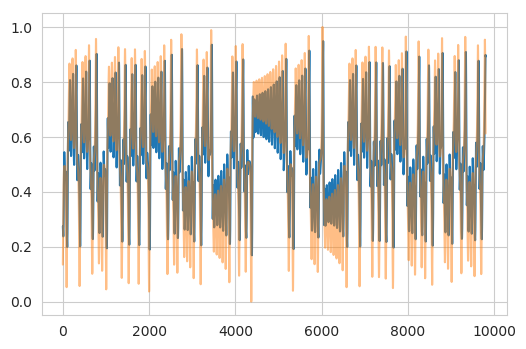

In [11]:
plt.figure(dpi=100)
plt.plot(pred)
plt.plot(y_test, alpha=0.5)

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from keras import regularizers
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [13]:
print(keras.wrappers.scikit_learn.__file__)

/home/yura/anaconda3/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py


In [14]:
def build_model():
    model = Sequential()
    model.add(Dense(3, input_shape=(X_train.shape[1],),
                    kernel_regularizer=regularizers.l2(0.0001), kernel_initializer='normal'))
    model.add(Activation('relu'))
    model.add(Dense(20, kernel_regularizer=regularizers.l2(0.0001), kernel_initializer='normal'))
    model.add(Activation('relu'))
    #model.add(Dense(20, kernel_regularizer=regularizers.l2(0.0001)))
    #model.add(Activation('relu'))
    #model.add(Dense(20, kernel_regularizer=regularizers.l2(0.001)))
    #model.add(Activation('relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    #sgd = SGD(decay=1e-4, momentum=0.9)
    adam = Adam(epsilon=1e-08)
    model.compile(loss='mse', optimizer=adam)
    #model.summary()
    
    return model

In [15]:
es_cb = EarlyStopping(monitor='binary_crossentropy', verbose=1, mode='auto')

estimator = KerasRegressor(build_fn=build_model, epochs=50, batch_size=200, verbose=1)
estimator.fit(X_train, y_train, shuffle=False) #, callbacks=[es_cb]

Epoch 1/50
6534/6534 [==============================] - 1s 94us/step - loss: 0.2808
Epoch 2/50
6534/6534 [==============================] - 0s 29us/step - loss: 0.2305
Epoch 3/50
6534/6534 [==============================] - 0s 24us/step - loss: 0.1646
Epoch 4/50
6534/6534 [==============================] - 0s 31us/step - loss: 0.0963
Epoch 5/50
6534/6534 [==============================] - 0s 30us/step - loss: 0.0534
Epoch 6/50
6534/6534 [==============================] - 0s 30us/step - loss: 0.0415
Epoch 7/50
6534/6534 [==============================] - 0s 29us/step - loss: 0.0406
Epoch 8/50
6534/6534 [==============================] - 0s 38us/step - loss: 0.0404
Epoch 9/50
6534/6534 [==============================] - 0s 24us/step - loss: 0.0401
Epoch 10/50
6534/6534 [==============================] - 0s 15us/step - loss: 0.0399
Epoch 11/50
6534/6534 [==============================] - 0s 27us/step - loss: 0.0396
Epoch 12/50
6534/6534 [==============================] - 0s 37us/step - lo

In [16]:
pred1 = estimator.predict(X_test)
estimator.score(X_train, y_train)

6534/6534 [==============================] - 0s 22us/step


-0.025637620372425753

In [17]:
r2_score(y_test, pred1)

0.44471971535747623

In [18]:
mean_squared_error(y_test, pred1)

0.025454929027332568

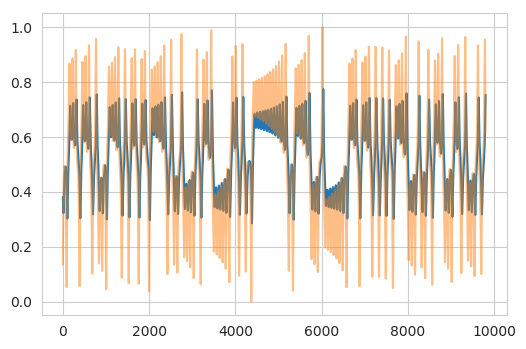

In [24]:
plt.figure(dpi=100)
plt.plot(pred1)
plt.plot(y_test, alpha=0.5)

In [21]:
y_test.shape

(9802,)